# Decision Tree

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn import tree
from sklearn.tree import plot_tree

from IPython.display import Image
import pydotplus

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
filename = 'housing.csv'
housing = pd.read_csv(filename)

In [3]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 집값(MEDV)을 다른 변수 전부로 예측
> Decision Tree는 선형성, 정규성, 등분산성 등의 통계적 가정이 없는 모델

선형 회귀는 변수의 관계를 모두 선형으로 가정하나, 현실의 데이터는 선형적이기보다는 비선형적일 경우가 많다. Decision Tree에는 종류를 예측하는 '분류 트리'와 수치를 예측하는 '회귀 트리'가 있다. 회귀 트리는 리프 노드에 속한 데이터 값의 평균을 통해 회귀 예측값을 계산한다. 
> 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 해보도록 한다. 

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [4]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [5]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

3) 모형의 성능 평가 - 과대적합

- 학습용 데이터를 지나치게 많이 공부해 낯선 데이터에는 성능 저하

In [6]:
print(model.score(X_train, y_train)) # 훈련은 완벽하다
print(model.score(X_test, y_test)) # 그러나 테스트 스코어는 좋지 않다

1.0
0.7827794072983825


In [7]:
model 

DecisionTreeRegressor()

In [8]:
# 이 파라미터는 대부분 과적합 방지 위해 복잡한 트리 생성되는것 방지하는 용도

# 1) max_depth : 트리의 최대 깊이 (None이면 모든 리프 노드가 순수해질때까지)
# 2) max_leaf_nodes : 리프 노드의 최대 개수
# 3) min_samples_split : 노드를 분할하기 위한 최소 샘플 개수
#    (정수 -> 최소값, 실수 -> 전체 샘플개수의 비율)
# 4) min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 개수
#    (정수 -> 최소값, 실수 -> 전체 샘플개수의 비율)

# 과적합 줄이려면 min으로 시작하는걸 늘려보거나 max로 시작하는걸 줄여본다
# 근데 대부분 max_depth만 사용(간단하고 빠르다 : 가장 중요한건 간단하고 빠른거)

# random_state : 설정해주지 않으면 방금 전의 결과 다시 보기 어려움

In [9]:
DecisionTreeRegressor?

In [10]:
# 과대적합
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.7827794072983825


4) 모형의 해석 : 주요 변수와 분기점의 의미

- 과대적합
> 주어진 데이터를 끝까지(지나치게) 학습한다. tree가 깊다.

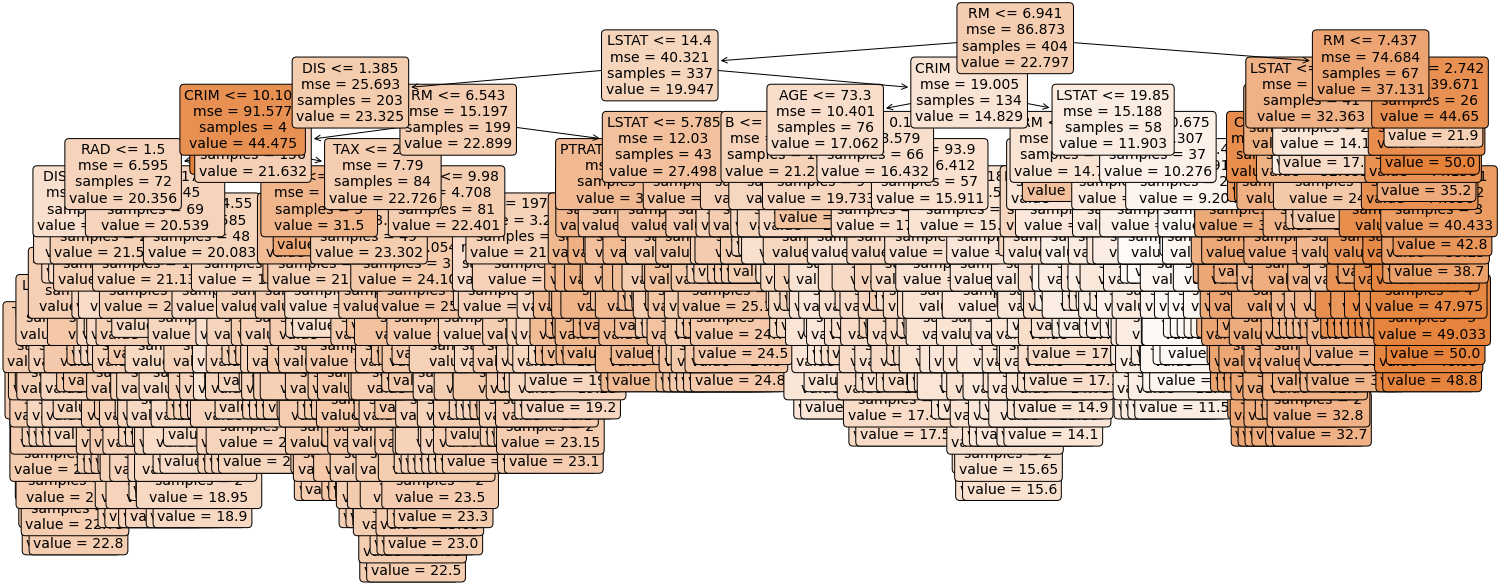

In [11]:
# Classifier의 criterion 기본값은 gini 
# Regressor는 mse 
plt.figure(figsize=(25,10))
a = plot_tree(model, feature_names=X_data.columns, class_names=y_target, 
              filled=True, rounded=True, fontsize=14)

과적합을 방지하는 방법
> 트리의 깊이 제한

In [12]:
model = DecisionTreeRegressor(random_state=42, max_depth=2) # 과적합 방지 위해 트리의 깊이 제한

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

- 과소적합
> 주어진 데이터를 충분히 학습하지 않았다.

In [13]:
# 과소적합
print(model.score(X_train, y_train)) # 훈련이 별로 안좋음 (학습이 충분하지 않음)
print(model.score(X_test, y_test))

0.7046893968727066
0.6455495710736121


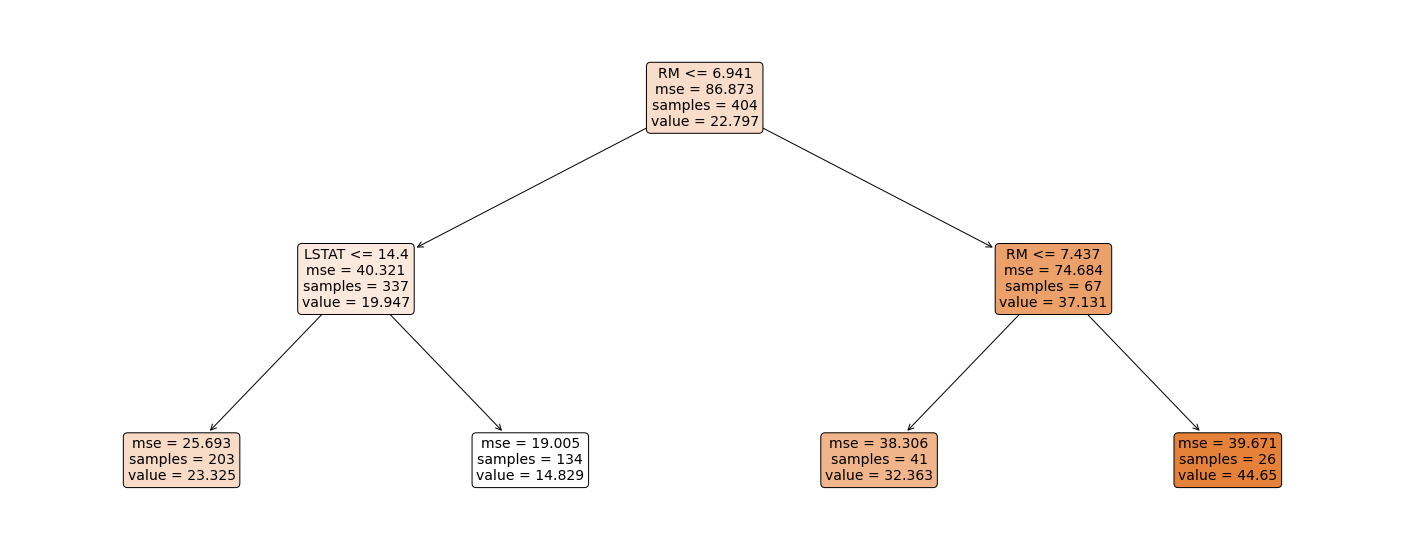

In [14]:
# Classifier의 criterion 기본값은 gini
# Regressor는 mse
plt.figure(figsize=(25,10))
a = plot_tree(model, feature_names=X_data.columns, class_names=y_target, 
              filled=True, rounded=True, fontsize=14)

Decision Tree 읽는 법
- 제일 위에서부터 조건이 True이면 왼쪽, False이면 오른쪽으로 이동
- root 노드 - branch(가지) - 노드 (마지막이 리프 노드)
> (생긴게 나무를 뒤집은 모양 : 뿌리root, 잎leaf)




### 과대적합-과소적합 사이의 균형 찾기
> 하이퍼파라미터 튜닝 : 여기에선 tree의 깊이만 조절

In [15]:
model = DecisionTreeRegressor(random_state=42, max_depth=6)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9416892544596489
0.8782439280592088


In [16]:
model = DecisionTreeRegressor(random_state=42, max_depth=4)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8882016055749843
0.7306868217984426


In [17]:
model = DecisionTreeRegressor(random_state=42, max_depth=5)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9185171013474737
0.8833565347917995


### 모델의 성능 평가

선택된 모형의 성능 평가 1) : .score()

In [18]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9185171013474737
0.8833565347917995


In [19]:
print('Decision Tree 회귀모형의 설명력 (R2 Score) :')
print('이 모형은 학습한 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_train, y_train)*100))
print('이 모형은 테스트 데이터에서 주택가격의 {:.1f}%를 설명한다'.format(model.score(X_test, y_test)*100))

Decision Tree 회귀모형의 설명력 (R2 Score) :
이 모형은 학습한 데이터에서 주택가격의 91.9%를 설명한다
이 모형은 테스트 데이터에서 주택가격의 88.3%를 설명한다


모형의 성능 평가 2) : 예측 정확도와 설명력

In [20]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

In [21]:
# 학습한 데이터에 대한 모형의 정확도 평가
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [22]:
print("학습한 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_train))
print('설명력(R2) : {:.3f}'.format(r2_score(y_train, y_train_preds)))
print('\n')
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

학습한 데이터에 대한 모형의 성능 :
정확도(RMSE) : 2.661
설명력(R2) : 0.919


테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 2.925
설명력(R2) : 0.883


### 여러 모델들의 성능을 한번에 비교

In [23]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn import tree
from sklearn.tree import plot_tree

from IPython.display import Image
import pydotplus

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [24]:
housing = pd.read_csv(filename)

In [25]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

Grid Search - 최적의 max_depth 찾기

In [26]:
max_depth_list = range(1,10) # 1 ~ 9까지 max_depth 설정하는 max_depth_list

# 여러 학습/테스트 데이터셋의 성능을 저장할 빈 리스트 선언
train_R2_list = []
test_R2_list = []

for i in max_depth_list:
    tree = DecisionTreeRegressor(random_state=42, max_depth=i)
    tree.fit(X_train, y_train)
    
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)

    train_R2_list.append(r2_score(y_train, pred_train))
    test_R2_list.append(r2_score(y_test, pred_test))

In [27]:
# max_depth_list, train_R2_list, test_R2_list 변수를 key로
# value로는 각 변수에 해당하는 값들로 이루어진 딕셔너리 선언
d = {
    'max_depth':max_depth_list,
    'Train R2':train_R2_list,
    'Test R2':test_R2_list
}

df = pd.DataFrame(d)
df

,max_depth,Train R2,Test R2
0,1,0.470264,0.360216
1,2,0.704689,0.645550
2,3,0.816956,0.771366
3,4,0.888202,0.730687
4,5,0.918517,0.883357
5,6,0.941689,0.878244
6,7,0.962518,0.877223
7,8,0.977565,0.877567
8,9,0.986973,0.878756


In [28]:
model = DecisionTreeRegressor(random_state=42, max_depth=5)

### 모델의 성능을 학습과정에서 최적화
> train 데이터를 **교차검증** (Cross Validation)

In [29]:
cross_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds의 개별 RMSE :  [4.29 6.16 5.07 6.38 5.07]
5 folds의 평균 RMSE : 5.394 


In [30]:
cross_val_score?

### 학습한 모델을 test 데이터로 최종 평가

In [31]:
model.fit(X_train, y_train)

y_test_preds = model.predict(X_test)

In [32]:
# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [33]:
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 2.925
설명력(R2) : 0.883


### 모델의 해석 : 주요 변수와 노드의 의미

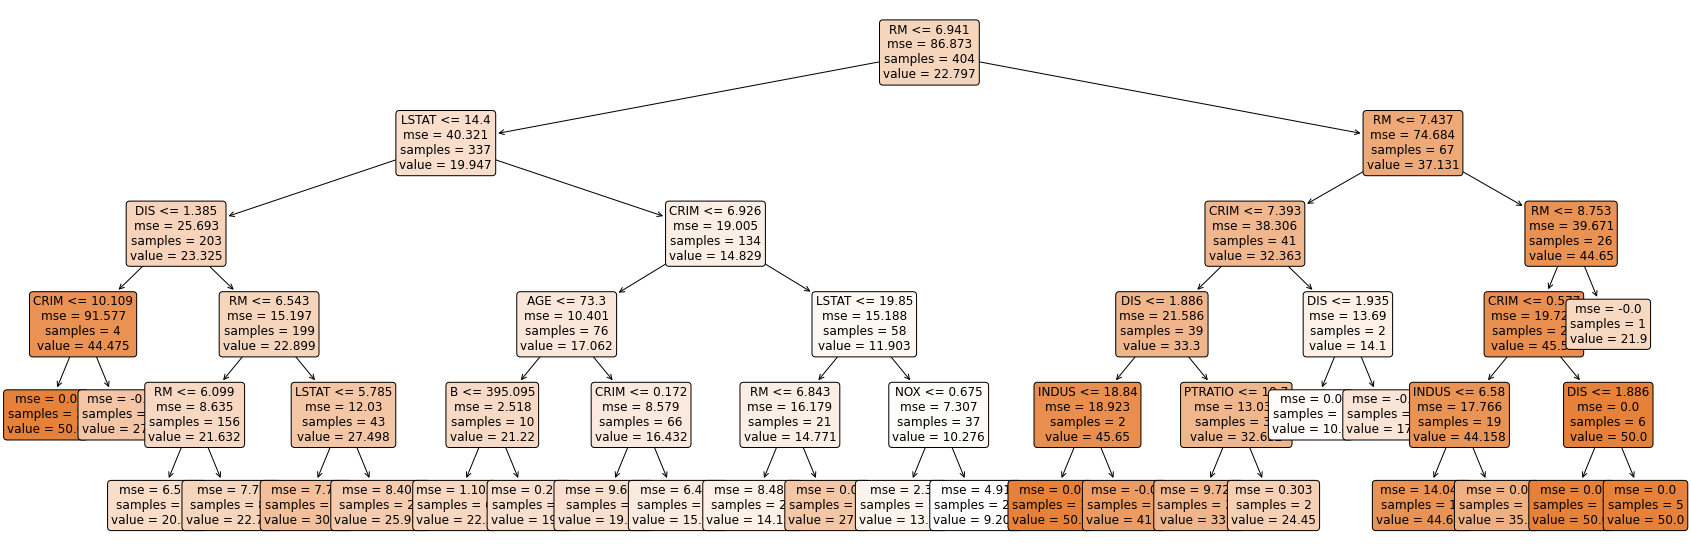

In [34]:
# Classifier의 criterion 기본값은 gini
# Regressor는 mse
plt.figure(figsize=(30,10))
a = plot_tree(model, feature_names=X_data.columns, class_names=y_target, 
              filled=True, rounded=True, fontsize=12) 


**"어떤 조건이 집값을 결정하는데 가장 중요한가?"**
- 제일 위에서부터 조건이 True이면 왼쪽, False이면 오른쪽으로 이동

> RM, LSTAT, DIS, CRIM...
- mse : 해당 그룹 내 집값의 평균오차
- sample : 해당 조건에 해당하는 데이터의 수
- value : 집값 ($1,000)

**"상위 노드의 데이터가 어떤 기준으로 하위 노드에서 나누어졌나?"**
- **분류** : 마지막 리프에 들어있는 것중의 **다수**가 예측한 클래스
- **회귀** : 마지막 리프에 들어있는 것들의 **평균값**이 예측한 값

특정 데이터의 비율이 높아지면(잘 나누어지면) 상자 색깔이 진해진다

### Decision Tree의 단점과 장점


**Decision Tree의 단점 :**

- 해석이 쉽다는 말은 '규칙'이 쉽다는 의미이지, '전달'이 좋다는 의미는 아니다. 
- 실전에서 많은 특성을 사용하고 트리도 깊어질 경우 해석(전달)이 어렵다.
- 트리가 깊어질 경우 과적합되기 쉽다. 성능을 위해 트리를 제한하는게 좋다.
- 그때 그때 결과가 다르다. 방금 전의 결과를 다시 보기 어렵다(휘발성).
- 알고리즘 특성상 모든 데이터 상황을 만족하는 규칙은 불가능하다.

**Decision Tree의 장점 :**

- 통계적 가정이 없어서 쉽게 다양한 종류의 데이터에 쓸 수 있다. 
- 계산량이 적고 빠르다. 데이터를 파악하는 EDA의 중요한 기법이다.
- 스케일이 계산에 영향을 미치지 않는다. 표준화 등 처리를 할 필요 없다.
- '앙상블'이라는 좋은 기법의 재료로 쓰인다.